# 01- Neural Networks for regression problems **Exercices**

1. Create your own regression dataset and build fit a model to it.
2. Try building a neural network with 4 Dens layers and fitting it to your own regression dataset, how doest it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
    - Building a larger model.
    - Increasing the number of units in each layer.
    - Lookup the documentation of **Adam** and find out what the first parameter is, what happens if you increase it by 10?
    - What happens if you train for longer?
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from Tensorflow `tf.keras.datasets` and model it.

In [1]:
# import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 1. Create your own regression dataset and build fit a model to it.

### Create a dataset and visualize it

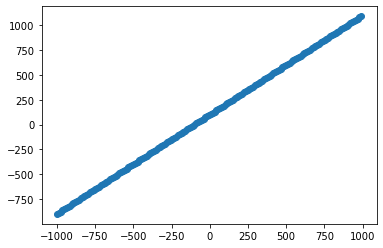

In [44]:
# Create a dataset 
X = np.arange(-1000,1000,12)
y = np.arange(-900,1100,12)

# View the data
plt.scatter(X,y)

### Split the data into a training and test set

In [45]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133,), (34,), (133,), (34,))

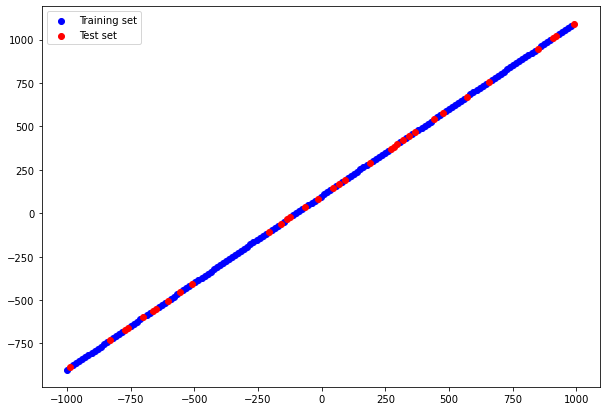

In [47]:
# Visualize the training set and testing set

plt.figure(figsize=(10,7))

# training set
plt.scatter(X_train,y_train, c="blue",label="Training set")

# test set
plt.scatter(X_test,y_test, c = "red", label="Test set")

# legend
plt.legend()

plt.show()

### Build a model

In [49]:
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# fit the model
history1 = model_1.fit(tf.expand_dims(X_train,axis=-1), y_train,epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 998us/step - loss: 320.3220 - mae: 320.3220
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 302.9496 - mae: 302.9496
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 285.6267 - mae: 285.6267
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 268.7196 - mae: 268.7196
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 252.0170 - mae: 252.0170
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 235.2018 - mae: 235.2018
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 218.2558 - mae: 218.2558
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 201.7807 - mae: 201.7807
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 185.0868 - mae: 185.0868
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 168.9220 - mae: 168.9220
Epoch 11/100
5/5 [===================

In [50]:
# Evaluate the model
model_1.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 97.7562 - mae: 97.7562


[97.75617218017578, 97.75617218017578]

<Figure size 720x504 with 0 Axes>

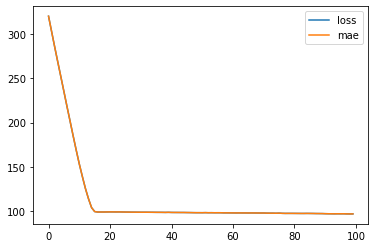

In [51]:
# Visualize the loss during the training
plt.figure(figsize=(10,7))
pd.DataFrame(history1.history).plot()
plt.show()

In [52]:
# Make some predictions
y_pred = model_1.predict(X_test)

In [58]:
def plot_predictions(X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, predictions = y_pred):
    """
    Plot the Training set, the test set and the predictions on a figure

    Inputs:
    - X_train : features data of the training set
    - y_train : labels of the training set
    - X_test : features data of the test set
    - y_test : labels of the test set
    - predictions : result of the prediction made by the model
    """

    plt.figure(figsize=(10,7))

    # training set
    plt.scatter(X_train,y_train, c="blue",label="Training set")

    # test set
    plt.scatter(X_test,y_test, c = "red", label="Test set")

    # predictions
    plt.scatter(X_test, predictions, c = "green", label = "Predictions")

    # legend
    plt.legend()

    plt.show()

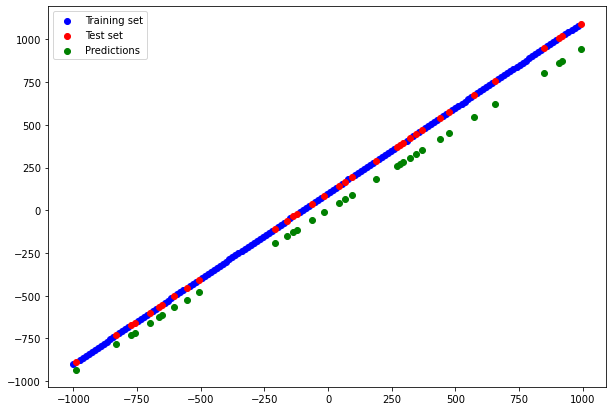

In [62]:
# Visualize the prediction
plot_predictions(predictions = y_pred)

### 2. Try building a neural network with 4 Dense layers and fitting it to the regression dataset

In [ ]:
# Build a neural network with 4 layers

tf.random.set_seed(42)